# Predicting default of a credit card holder
Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Content
There are 25 variables:


Customer ID: ID of each client
Credit_Amount: Amount of given credit in NT dollars (includes individual and family/supplementary credit
Gender: sex (1=male, 2=female)
Academic_Qualification: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
Marital: Marital status (1=married, 2=single, 3=others)
Age_Years: Age in years
Repayment_Status_Jan: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
Repayment_Status_Feb: Repayment status in August, 2005 (scale same as above)
Repayment_Status_March: Repayment status in July, 2005 (scale same as above)
Repayment_Status_April: Repayment status in June, 2005 (scale same as above)
Repayment_Status_May: Repayment status in May, 2005 (scale same as above)
Repayment_Status_June: Repayment status in April, 2005 (scale same as above)
Jan_Bill_Amount: Amount of bill statement in September, 2005 (NT dollar)
Feb_Bill_Amount: Amount of bill statement in August, 2005 (NT dollar)
March_Bill_Amount: Amount of bill statement in July, 2005 (NT dollar)
April_Bill_Amount: Amount of bill statement in June, 2005 (NT dollar)
May_Bill_Amount: Amount of bill statement in May, 2005 (NT dollar)
June_Bill_Amount: Amount of bill statement in April, 2005 (NT dollar)
Previous_Payment_Jan: Amount of previous payment in September, 2005 (NT dollar)
Previous_Payment_Feb: Amount of previous payment in August, 2005 (NT dollar)
Previous_Payment_March: Amount of previous payment in July, 2005 (NT dollar)
Previous_Payment_April: Amount of previous payment in June, 2005 (NT dollar)
Previous_Payment_May: Amount of previous payment in May, 2005 (NT dollar)
Previous_Payment_June: Amount of previous payment in April, 2005 (NT dollar)
Default_Payment: Default payment (1=yes, 0=no)

In [3]:
import os as os

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
df_credit_card = pd.read_csv('BankCreditCard.csv');df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [6]:
df_credit_card.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df_credit_card.describe()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,...,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,...,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,...,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,...,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,...,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,...,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,...,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [8]:
df_credit_card.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

In [9]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [10]:
#Drop customer id column
df_credit_card.drop('Customer ID', axis=1,inplace=True);

In [11]:
#counts each category in default payment variable
df_credit_card['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

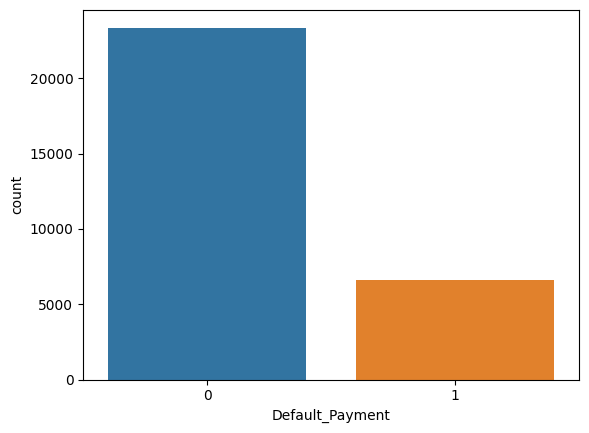

In [12]:
sns.countplot(x='Default_Payment', data=df_credit_card)
plt.show()

In [13]:
df_credit_card['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

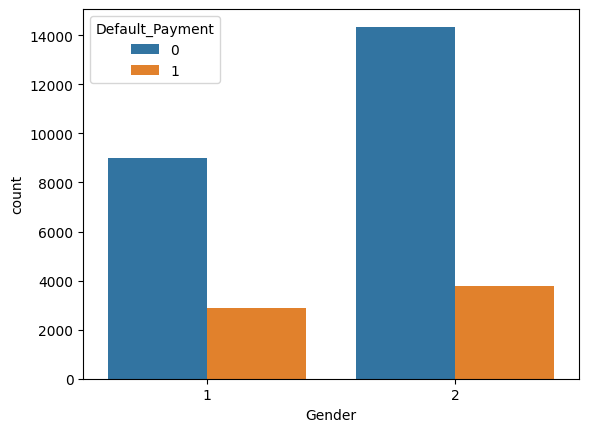

In [14]:
sns.countplot(x='Gender',hue='Default_Payment',data=df_credit_card);
plt.show()

In [15]:
df_credit_card['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

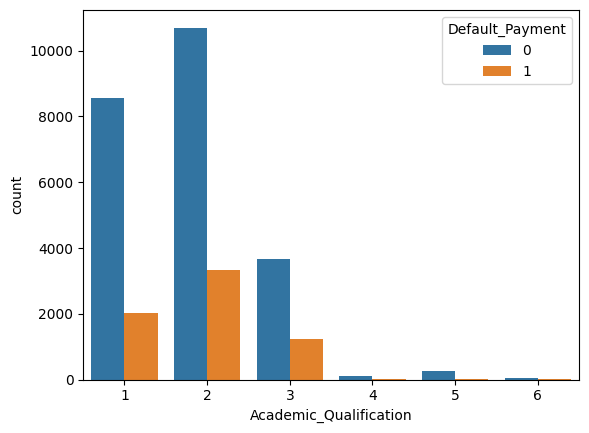

In [16]:
sns.countplot(x='Academic_Qualification',hue='Default_Payment',data=df_credit_card)
plt.show()

In [17]:
df_credit_card['Marital'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

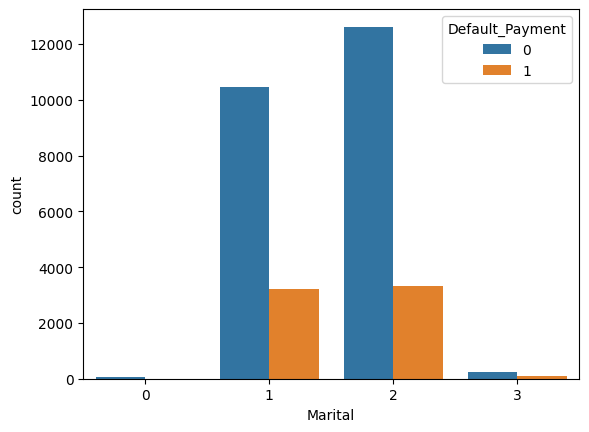

In [18]:
sns.countplot(x='Marital',hue='Default_Payment',data=df_credit_card)
plt.show()

Text(0, 0.5, 'Default Payment')

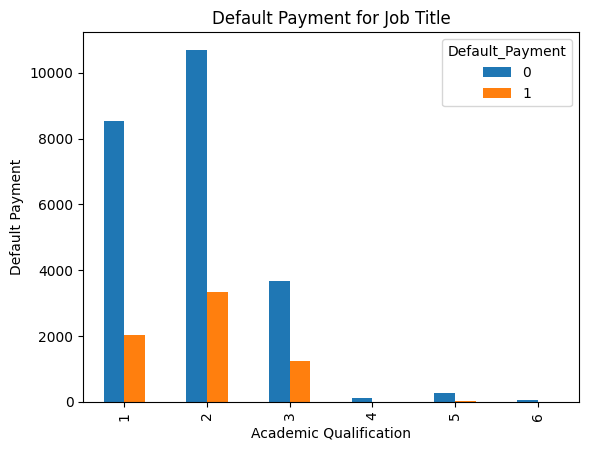

In [19]:
%matplotlib inline
pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Default_Payment).plot(kind='bar')
plt.title('Default Payment for Job Title')
plt.xlabel('Academic Qualification')
plt.ylabel('Default Payment')

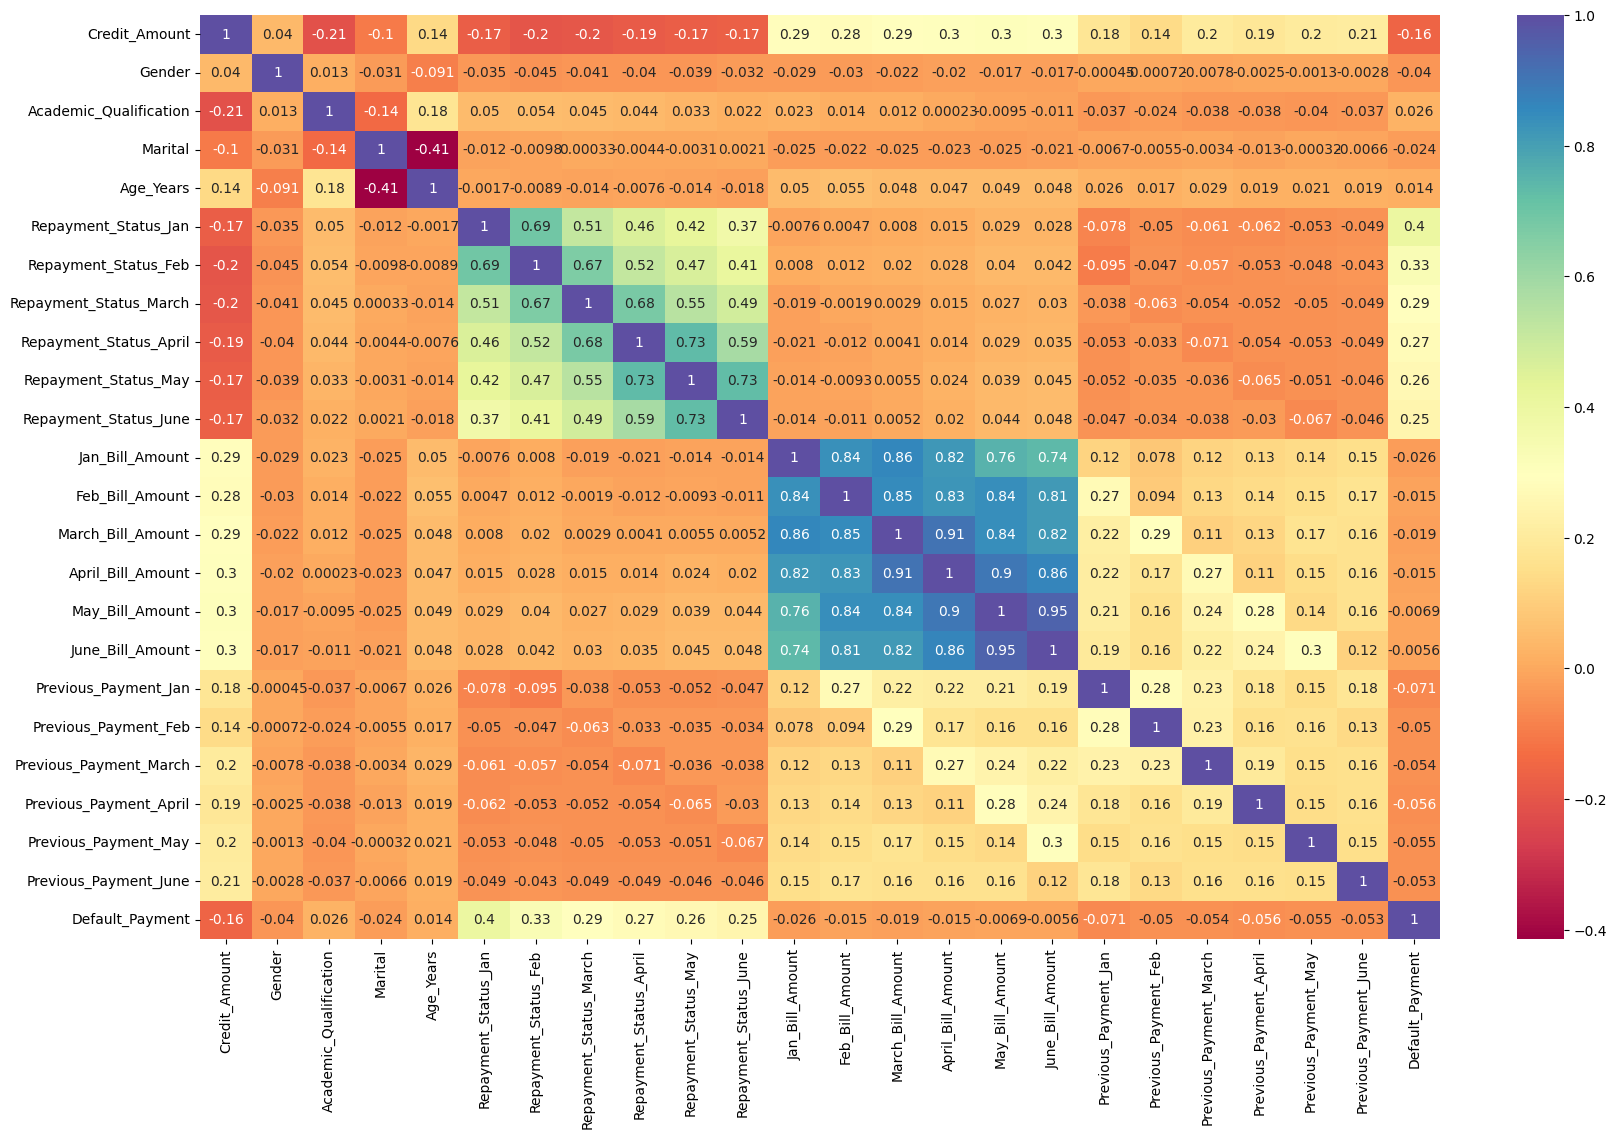

In [20]:
#calculating correlation among numeric variable 
corr_matrix = df_credit_card.corr() 

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
            cmap='Spectral',
            annot=True);

In [21]:
#Create empty array
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)

#For loop to filter columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
# Selected column store into a variable
selected_columns = df_credit_card.columns[columns]
df_with_filtered_columns = df_credit_card[selected_columns]

In [22]:
X = df_credit_card.drop('Default_Payment',axis=1)
y = df_credit_card.loc[:,'Default_Payment']

In [23]:
from sklearn.preprocessing import StandardScaler  

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

In [24]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X_std, y,test_size=0.3, random_state=0, stratify=y)

In [25]:
from sklearn.svm import SVC # "Support vector classifier"
linear_svc = SVC(kernel='linear', C=1.0,random_state=42)

In [26]:
linear_svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [27]:
linear_svc.support_vectors_[0]

array([ 0.35591432,  0.81016074, -1.07748156,  0.85855728,  1.14067961,
        2.20195843,  2.1114352 , -0.3875351 , -0.34508847, -0.31359711,
       -0.32102812, -0.65942294, -0.65319759, -0.66734403, -0.6327451 ,
       -0.63370487, -0.61314774, -0.33179124, -0.21530497, -0.17327731,
       -0.29980379, -0.11149369, -0.12046364])

In [28]:
linear_svc_pred_test =linear_svc.predict(X_test)

In [29]:
linear_svc_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
np.unique(linear_svc_pred_test,return_counts=True)

(array([0, 1], dtype=int64), array([7941, 1059], dtype=int64))

In [31]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.82


In [32]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.82


In [33]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, linear_svc_pred_test)
print(confusion_matrix)

[[6669  340]
 [1272  719]]


In [34]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_svc_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



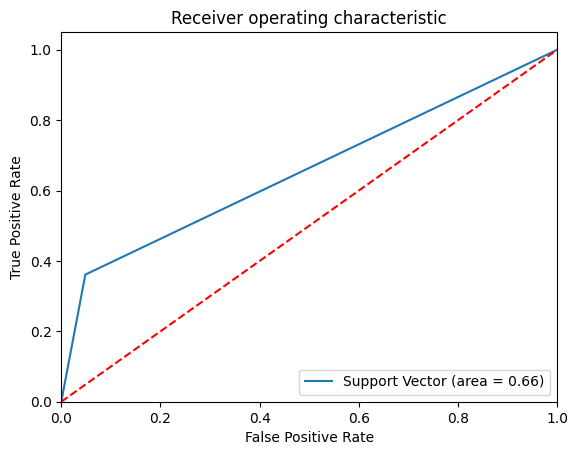

In [35]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
# create a figure object
plt.figure()
#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)
#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')
#x-axis limitation
plt.xlim([0.0, 1.0])
#y-axis limitaion
plt.ylim([0.0, 1.05])
#x-axis label
plt.xlabel('False Positive Rate')
#y-axis label
plt.ylabel('True Positive Rate')
#title for plot
plt.title('Receiver operating characteristic')
#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

In [36]:
#SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0)

In [37]:
rbf_svc.fit(X_train,y_train)

SVC(gamma=0.7)

In [38]:
rbf_svc.support_vectors_

array([[ 1.26303604e+00,  8.10160740e-01,  1.81356620e-01, ...,
         2.18804189e-01, -1.31329791e-01,  1.22783874e+00],
       [ 3.55914324e-01,  8.10160740e-01, -1.07748156e+00, ...,
        -2.99803790e-01, -1.11493688e-01, -1.20463641e-01],
       [ 5.07101276e-01,  8.10160740e-01, -1.07748156e+00, ...,
         4.46875858e+00,  1.92196427e+01,  2.69249693e-01],
       ...,
       [-1.08036172e+00,  8.10160740e-01, -1.07748156e+00, ...,
        -2.70569970e-01, -2.80247720e-01, -2.93382058e-01],
       [ 5.35404199e-02, -1.23432296e+00, -1.07748156e+00, ...,
        -7.46558307e-03, -1.33095616e-01, -2.93382058e-01],
       [-7.77987816e-01, -1.23432296e+00,  1.44019480e+00, ...,
        -2.99803790e-01, -3.09678140e-01, -2.93382058e-01]])

In [39]:
pred_test = rbf_svc.predict(X_test)

In [40]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(rbf_svc.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.89


In [41]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(rbf_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.80


In [42]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#creat a logistic regression model with SGD
modelCV = SVC(kernel='rbf', gamma=0.7, C=1.0)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, X_std, y, cv=3 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.796
[0.7933 0.7962 0.7989]


In [43]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6821  188]
 [1634  357]]


In [44]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.66      0.18      0.28      1991

    accuracy                           0.80      9000
   macro avg       0.73      0.58      0.58      9000
weighted avg       0.77      0.80      0.75      9000



In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
model_grid_search = SVC(kernel='rbf')

In [47]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10],
              "gamma": [0.0001, 0.001, 0.01, 0.1, 1],
              }

In [48]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
grid_search = GridSearchCV(model_grid_search, param_grid=param_grid)

grid_search.fit(X_train, y_train);

In [49]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

Best score for data1: 0.8204285714285714


In [50]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C) 
print('Best n_iter:',grid_search.best_estimator_.gamma)

Best C: 10
Best n_iter: 0.001


In [51]:
model_grid = SVC(kernel='rbf', C=10, gamma=0.001)

In [52]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_grid.fit(X_train,y_train)

SVC(C=10, gamma=0.001)

In [53]:
pred_test = model_grid.predict(X_test)

In [54]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.82


In [55]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.82


In [56]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6732  277]
 [1348  643]]


In [57]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.70      0.32      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



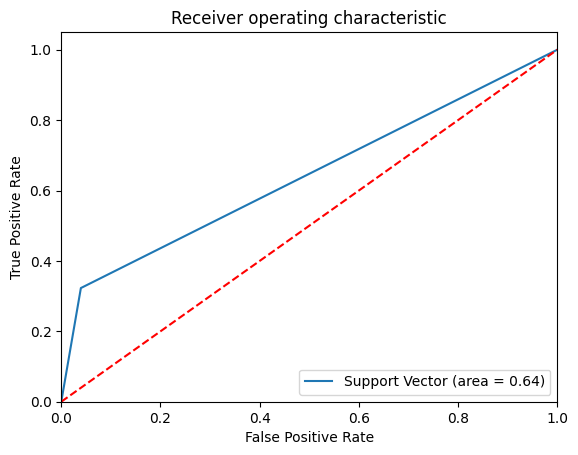

In [58]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

In [59]:
# SVC with polynomial (degree 3) kernel
poly_svc = SVC(kernel='poly', degree=3, C=1.0)

In [61]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

poly_svc.fit(X_train,y_train)

SVC(kernel='poly')

In [63]:
pred_test = poly_svc.predict(X_test)

In [64]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.83


In [65]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(poly_svc.score(X_test, y_test)))

Accuracy of support vector classifier on test set: 0.81


In [66]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6661  348]
 [1337  654]]


In [67]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



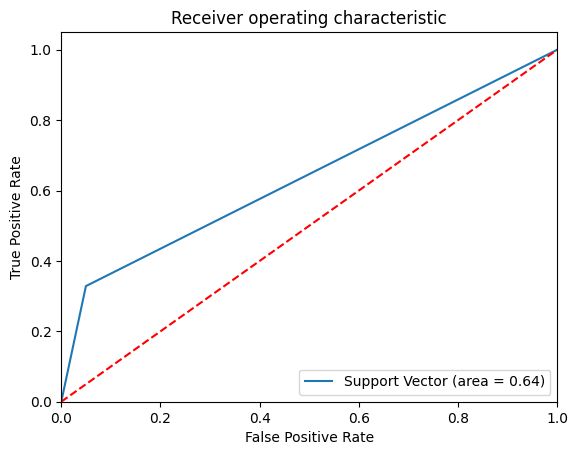

In [68]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

In [69]:
import pandas as pd

df_accuracy= pd.DataFrame({"Linear Kernel":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"47%","AUC Score":"66%"},
                  "RBF Kernel with grid search":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"46%","AUC Score":"65%"},
                  "Polynomial Kernel":{"Accuracy on training data":"83%","Accuracy on testing data":"81%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"43%","AUC Score":"63%"}})

In [70]:
df_accuracy = df_accuracy.reindex(["Accuracy on training data", "Accuracy on testing data", "AUC Score", "F1 Score for 'No'","F1 Score for 'Yes'"])
df_accuracy

,Linear Kernel,RBF Kernel with grid search,Polynomial Kernel
Accuracy on training data,82%,82%,83%
Accuracy on testing data,82%,82%,81%
AUC Score,66%,65%,63%
F1 Score for 'No',89%,89%,89%
F1 Score for 'Yes',47%,46%,43%


In [71]:
df_credit_card = pd.read_csv('BankCreditCard.csv');df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

In [72]:
df_defaulters_count,df_non_defaulters_count=df_credit_card.Default_Payment.value_counts()

In [73]:
df_defaulters_count

23364

In [74]:
df_non_defaulters_count

6636

In [75]:
#Splitting/dividing the entire datasetby class 

df_defaulters_0=df_credit_card[df_credit_card['Default_Payment']==0]

df_defaulters_1=df_credit_card[df_credit_card['Default_Payment']==1]

In [76]:
df_defaulters_0.shape

(23364, 25)

In [77]:
df_defaulters_0.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,29394.0,18618.0,20024.0,3600.0,2725.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473844.0,66000.0,40000.0,59000.0,30339.0,13750.0,13770.0,0


In [78]:
df_defaulters_1.shape

(6636, 25)

In [79]:
df_defaulters_1.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
13,14,70000.0,1,2,2,30,1,2,2,0,...,66792.0,36137.0,36884.0,3300.0,0.0,5000.0,3000.0,1500.0,0.0,1
16,17,20000.0,1,1,2,24,0,0,2,2,...,29339.0,17805.0,18104.0,3300.0,0.0,1500.0,0.0,1650.0,0.0,1
21,22,220000.0,2,2,1,39,0,0,0,0,...,0.0,632.0,316.0,316.0,326.0,0.0,533.0,316.0,0.0,1


In [80]:
#Technique 1 ----Undersampling

df_defaulters_0_under_sampled=df_defaulters_0.sample(df_non_defaulters_count)

df_defaulters_0_under_sampled.shape

(6636, 25)

In [81]:
#now lets concat the undersampled(Non defaulters) and the df_defaulters_0_under_sampled

balanced_df=pd.concat([df_defaulters_0_under_sampled,df_defaulters_1],axis=0)

balanced_df.shape

(13272, 25)

In [82]:
balanced_df.Default_Payment.value_counts()

0    6636
1    6636
Name: Default_Payment, dtype: int64

In [83]:
X = balanced_df.drop('Default_Payment',axis=1)
y = balanced_df.loc[:,'Default_Payment']

In [84]:
from sklearn.preprocessing import StandardScaler  

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

In [85]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
                                                    test_size=0.3, random_state=0, stratify=y)

In [86]:
from sklearn.svm import SVC # "Support vector classifier"

In [87]:
linear_svc = SVC(kernel='linear', C=1.0,random_state=42)

In [88]:
linear_svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [89]:
linear_svc.support_vectors_

array([[-0.72090676,  0.54303689,  0.83354826, ..., -0.22084639,
        -0.26292087, -0.20868065],
       [ 1.09362422,  0.16006802, -1.19969058, ...,  0.63925382,
         0.63619854,  0.02043149],
       [ 0.55563252, -0.91224483,  0.83354826, ..., -0.2243859 ,
        -0.20673744, -0.2061007 ],
       ...,
       [-0.70080469,  0.84941199, -1.19969058, ..., -0.31251962,
         0.05346442, -0.28790399],
       [ 0.09839767, -0.98883861,  0.83354826, ..., -0.28809702,
         0.20511052, -0.22497838],
       [-1.50686267,  0.16006802,  0.83354826, ..., -0.31641308,
        -0.24792223, -0.28790399]])

In [90]:
linear_svc_pred_test =linear_svc.predict(X_test)

In [91]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(X_train, y_train)))

Accuracy of support vector classifier on test set: 0.69


In [92]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, linear_svc_pred_test)
print(confusion_matrix)

[[1719  272]
 [ 979 1012]]


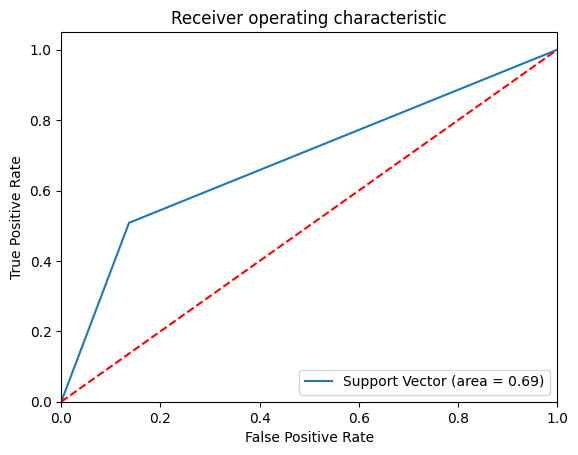

In [93]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
# create a figure object
plt.figure()
#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label='Support Vector (area = %0.2f)' % roc_auc)
#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')
#x-axis limitation
plt.xlim([0.0, 1.0])
#y-axis limitaion
plt.ylim([0.0, 1.05])
#x-axis label
plt.xlabel('False Positive Rate')
#y-axis label
plt.ylabel('True Positive Rate')
#title for plot
plt.title('Receiver operating characteristic')
#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()